本文件用于对比单阈值和多阈值的accuracy、hamming_loss、f1_score的性能表现

In [1]:
from sklearn.datasets import make_multilabel_classification
# from bls2 import broadnet
import bls1,bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('yeast', 'train')
X_test, y_test, _, _ = load_dataset('yeast', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

yeast:train - exists, not redownloading
yeast:test - exists, not redownloading


In [4]:
num=50

In [5]:
bls = bls1.broadnet(maptimes = 40,
               enhencetimes = 40,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)
bls_2 = bls3.broadnet(maptimes = 40,
               enhencetimes = 40,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)

In [6]:
accuracy=[]
hamming=[]
f1=[]
accuracy_2=[]
hamming_2=[]
f1_2=[]
for i in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    bls.fit(X_train,y_train)
    predition=bls.predict(X_test)
    accuracy.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))
    y_train[y_train==0]=-1
    bls_2.fit(X_train,y_train)
    predition=bls_2.predict(X_test)
    accuracy_2.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming_2.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1_2.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))


number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 28.03453 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 29.52197 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 29.29434 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 29.08105 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 28.1032 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 31.91623 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 28.02014 minvalue 0.0 
enhence nodes maxval

number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 27.45791 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 29.4457 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 28.73425 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 27.635 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 30.54138 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 27.90617 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 29.00814 minvalue 0.0 
enhence nodes maxvalue

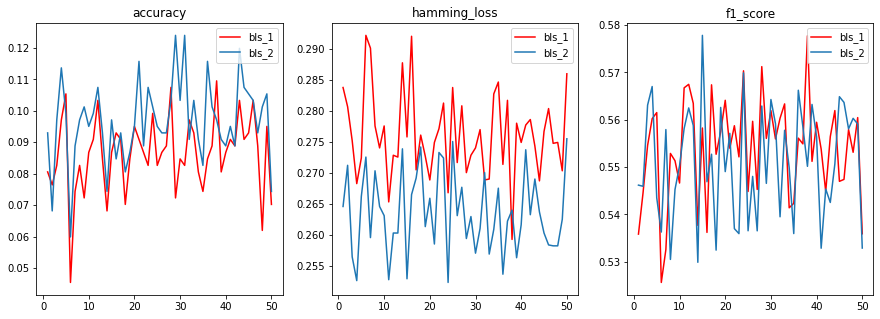

In [7]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy,color='red',label='bls_1')
plt.plot(range(1,num+1),accuracy_2,label='bls_2')
plt.legend(loc='upper right')
plt.subplot(1,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming,color='red',label='bls_1')
plt.plot(range(1,num+1),hamming_2,label='bls_2')
plt.legend(loc='upper right')
plt.subplot(1,3,3)
plt.title("f1_score")
plt.plot(range(1,num+1),f1,color='red',label='bls_1')
plt.plot(range(1,num+1),f1_2,label='bls_2')
plt.legend(loc='upper right')
plt.show()

In [8]:
y_train[y_train==0]=-1

In [9]:
bls_2.fit(X_train,y_train)
predition=bls_2.predict(X_test)
print(accuracy_score(y_pred=predition,y_true=y_test))
print(hamming_loss(y_pred=predition,y_true=y_test))
print(f1_score(y_pred=predition,y_true=y_test,average='micro'))

number of mapping nodes 4000, number of enhence nodes 4000
mapping nodes maxvalue 31.7393 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
0.1012396694214876
0.26903778040141674
0.5369570739141479


In [10]:
X.shape
X_train.shape

(1933, 103)

In [14]:
print(np.mean(accuracy))
print(np.mean(hamming))
print(np.mean(f1))

0.08636363636363635
0.2762160566706021
0.553865775811428


In [15]:
print(np.mean(accuracy_2))
print(np.mean(hamming_2))
print(np.mean(f1_2))

0.09657024793388432
0.2635773317591499
0.5511822697804027


In [16]:
X_train, y_train, feature_names, label_names = load_dataset('birds', 'train')
X_test, y_test, _, _ = load_dataset('birds', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

birds:train - exists, not redownloading
birds:test - exists, not redownloading


In [17]:
X.shape

(645, 260)

In [18]:
y.shape

(645, 19)